In [32]:
!pip install kora -q
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [33]:
from kora.selenium import wd as browser
from selenium.webdriver.common.by import By
import pandas as pd 
import time
from datetime import date,datetime as dt
import datetime
from bs4 import BeautifulSoup
import numpy as np
import re 
from datetime import  timedelta

In [118]:
amazon = []

In [120]:
for i in range(1,151):
  url=f"https://www.amazon.in/realme-narzo-Mint-Green-Storage/product-reviews/B09FKDH6FS/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={i}"
  browser.get(url)
  containers=[x.get_attribute('innerHTML') for x in browser.find_elements(By.XPATH,'//div[@class="a-section celwidget"]')]
  for container in containers:
    dict1=dict()
    bsObj=BeautifulSoup(container)
    #review 
    rev=bsObj.find('span',attrs={"class":"a-size-base review-text review-text-content"}).text.strip()
    #rating
    try:
      rating=bsObj.find('a',attrs={"class":"a-link-normal"})["title"]
      rating=int(float(rating[0]))
    except:
      rating=np.NaN
    

      

    dict1["rating"]=rating
    dict1["review"]=rev

    amazon.append(dict1)


In [121]:
amazon_reviews = pd.DataFrame(amazon)

In [122]:
amazon_reviews

,rating,review
0,4,Good mobile in lower budget ..
1,4,Thik thak hai
2,4,
3,4,Overall good performance as per budget.
4,4,Super product👌
...,...,...
1495,1,Mobile Phone is getting overheated while the n...
1496,1,Sound quality is very poor 😔😔😔😔
1497,1,Such a trash from Realme.....👎👎👎On every aspec...
1498,1,Very bad camera very slow and hangs too much


In [123]:
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   rating  1500 non-null   int64 
 1   review  1500 non-null   object
dtypes: int64(1), object(1)
memory usage: 23.6+ KB


In [124]:
amazon_reviews.to_csv(r'Amazon.csv', index= False, header=True)

##WordClouds and EDA

In [125]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Count')

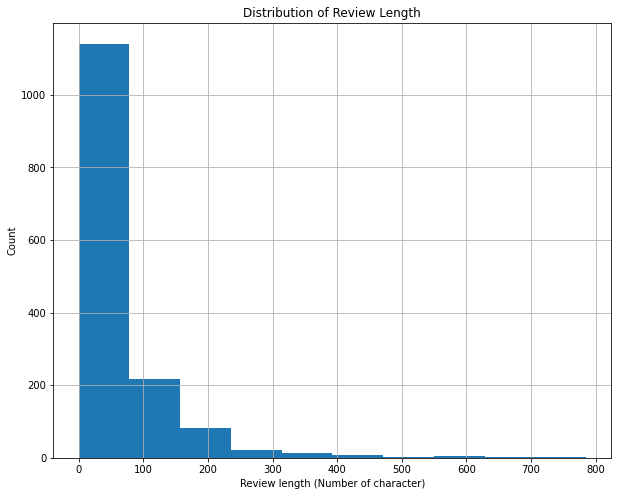

In [126]:
# Plot distribution of review length
review_length = amazon_reviews["review"].dropna().map(lambda x: len(x))
plt.figure(figsize=(10,8))
review_length.loc[review_length < 1500].hist()
plt.title("Distribution of Review Length")
plt.xlabel('Review length (Number of character)')
plt.ylabel('Count')

In [127]:
from wordcloud import WordCloud, STOPWORDS
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [128]:
wc = WordCloud(width=1200, height=800, max_words=200, stopwords=STOPWORDS)

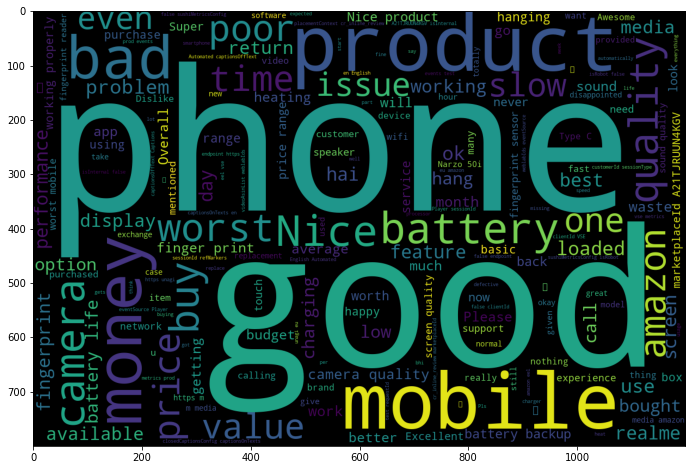

In [129]:
plt.figure(figsize = (12,8))
plt.imshow(wc.generate_from_text(" ".join(amazon_reviews.review)))
plt.show()

In [130]:
tf = CountVectorizer(token_pattern = "[a-z']+", max_df = 0.6, min_df=10, stop_words =STOPWORDS)

In [131]:
tf_mat = tf.fit_transform(amazon_reviews.review)
tf_mat


<1500x158 sparse matrix of type '<class 'numpy.int64'>'
	with 5249 stored elements in Compressed Sparse Row format>

In [132]:
tf.vocabulary_

{'good': 57,
 'mobile': 80,
 'budget': 19,
 'hai': 60,
 'overall': 99,
 'performance': 101,
 'per': 100,
 'super': 133,
 'product': 110,
 'go': 56,
 'camera': 25,
 'want': 149,
 'nice': 90,
 'price': 106,
 'version': 147,
 'amazon': 0,
 'app': 1,
 'lock': 72,
 'available': 5,
 'finger': 49,
 'print': 107,
 'mentioned': 79,
 'face': 45,
 'ok': 94,
 'phone': 102,
 'range': 117,
 'normal': 91,
 'usage': 142,
 'u': 141,
 'quality': 115,
 'bad': 11,
 'best': 14,
 'time': 137,
 'speaker': 131,
 'type': 140,
 'c': 22,
 'charging': 27,
 'fingerprint': 50,
 'sensor': 126,
 'look': 73,
 'awesome': 7,
 'average': 6,
 'battery': 13,
 'still': 132,
 'working': 155,
 'excellent': 41,
 'bought': 16,
 'low': 75,
 'phones': 103,
 'ram': 116,
 'processor': 109,
 'dont': 38,
 'use': 143,
 'work': 154,
 'day': 31,
 'screen': 125,
 'option': 98,
 'basic': 12,
 'video': 148,
 'calling': 24,
 'features': 48,
 'using': 145,
 'month': 83,
 'life': 70,
 'expected': 43,
 'happy': 64,
 'value': 146,
 'money': 82,

In [133]:
tf_vocab_reverse = {v:k for k,v in tf.vocabulary_.items()}
tf_vocab_reverse

{57: 'good',
 80: 'mobile',
 19: 'budget',
 60: 'hai',
 99: 'overall',
 101: 'performance',
 100: 'per',
 133: 'super',
 110: 'product',
 56: 'go',
 25: 'camera',
 149: 'want',
 90: 'nice',
 106: 'price',
 147: 'version',
 0: 'amazon',
 1: 'app',
 72: 'lock',
 5: 'available',
 49: 'finger',
 107: 'print',
 79: 'mentioned',
 45: 'face',
 94: 'ok',
 102: 'phone',
 117: 'range',
 91: 'normal',
 142: 'usage',
 141: 'u',
 115: 'quality',
 11: 'bad',
 14: 'best',
 137: 'time',
 131: 'speaker',
 140: 'type',
 22: 'c',
 27: 'charging',
 50: 'fingerprint',
 126: 'sensor',
 73: 'look',
 7: 'awesome',
 6: 'average',
 13: 'battery',
 132: 'still',
 155: 'working',
 41: 'excellent',
 16: 'bought',
 75: 'low',
 103: 'phones',
 116: 'ram',
 109: 'processor',
 38: 'dont',
 143: 'use',
 154: 'work',
 31: 'day',
 125: 'screen',
 98: 'option',
 12: 'basic',
 148: 'video',
 24: 'calling',
 48: 'features',
 145: 'using',
 83: 'month',
 70: 'life',
 43: 'expected',
 64: 'happy',
 146: 'value',
 82: 'money',

#Analyzing using TFIDF

In [134]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import cohen_kappa_score

In [135]:
data_1 = amazon_reviews[~amazon_reviews['review'].isnull()]
data_1.shape

(1500, 2)

In [136]:
data_1.rating.value_counts()

1    509
5    485
4    234
3    163
2    109
Name: rating, dtype: int64

In [137]:
train_data = data_1.iloc[:1050]
test_data = data_1.iloc[1051:]

In [138]:
(train_data.shape, test_data.shape)

((1050, 2), (449, 2))

In [139]:
x_train, x_val, y_train, y_val = train_test_split(train_data.iloc[:,1:],
                                                  train_data.iloc[:,0],
                                                  test_size=0.4,
                                                  random_state = 123456)

In [140]:
x_train.shape

(630, 1)

In [141]:
from wordcloud import STOPWORDS

In [142]:
tfidf = TfidfVectorizer(stop_words=STOPWORDS, token_pattern="[a-z']+", 
                        max_df=0.55, min_df=10)

In [143]:
tfidf_mat_train = tfidf.fit_transform(x_train['review'])
tfidf_mat_val = tfidf.transform(x_val['review'])
tfidf_mat_test = tfidf.transform(test_data['review'])

In [144]:
lr_model_1 = LogisticRegression()
lr_model_1.fit(X=tfidf_mat_train, y=y_train)

LogisticRegression()

In [145]:
pred_val_lr = lr_model_1.predict(tfidf_mat_val)
cohen_kappa_score(pred_val_lr, y_val)

0.22921575227196234

In [155]:
N =50
svd = TruncatedSVD(n_components=N)
svd_mat_train = svd.fit_transform(tfidf_mat_train)
svd_mat_val = svd.transform(tfidf_mat_val)
svd_mat_test = svd.transform(tfidf_mat_test)

In [156]:
lr_model_2 = LogisticRegression()
lr_model_2.fit(X=svd_mat_train, y=y_train)
pred_val_lr2 = lr_model_2.predict(svd_mat_val)
cohen_kappa_score(pred_val_lr2, y_val)

0.22750520320743461

In [157]:
gbm = GradientBoostingClassifier(learning_rate=0.01, 
                                 n_estimators=2000, max_depth=1)

In [158]:
gbm_1 = gbm.fit(X=svd_mat_train, y=y_train)
pred_val_gbm1 = gbm_1.predict(svd_mat_val)
cohen_kappa_score(pred_val_gbm1, y_val)

0.23983118037591988

##SPACY

In [159]:
import spacy
import pandas as pd
import numpy as np

In [160]:
!python -m spacy download en_core_web_lg

2022-09-29 23:30:20.763513: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 587.7 MB 7.0 kB/s 
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [161]:
nlp = spacy.load('en_core_web_lg')

In [162]:
fp_rev = amazon_reviews.iloc[0,:]["review"]

In [163]:
texts = nlp(fp_rev)

In [164]:
for token in texts[:1000]:
  print(token.text, token.pos_)

Good ADJ
mobile NOUN
in ADP
lower ADJ
budget NOUN
.. PUNCT


In [171]:
list(texts.noun_chunks)[:1000]

[Good mobile, lower budget]

In [172]:
for ent in texts.ents:
  print(ent.text, ent.label_)

In [173]:
#To find dependencies (Dependency Parsing)

for token in texts:
  if token.ent_type_ == 'ORG':
    txt = " ".join([i.text for i in token.subtree])
    if txt !=token.text:
      print(token.text, token.dep_, " ".join([i.text for i in token.subtree]))


In [174]:
from spacy import displacy

In [175]:
sent1 = list(texts.sents)
sent1

[Good mobile in lower budget ..]

In [176]:
displacy.render(sent1, jupyter = True)

##Entity Recognizer

In [177]:
data = amazon_reviews['review'].values.tolist()

str=''
for i in data:
  #print(i)
  str=str+''.join(i)
  str=str.lower()
str

'good mobile in lower budget ..thik thak haioverall good performance as per budget.super product👌go for it if camera doesn\'t bother you and you just want to make calls.nice productgood mobile at this price. it has android go version so amazon pay app not supported. app lock facility not available. clone app not available. no realmeui theme app is not present. finger print not available as mentioned but face unlock is available. otherwise it is ok phone at this price rangeits good for normal usage u can\'t play pubg and other heavy games but for normal usage it\'s good camera quality is bad 👎best product for person who uses phone less time.position of the speaker is a designed flaw,we cannot place the phone facing upwardsgood phone. type c charging facility not available in this phone. it has not fingerprint sensor. look is goodin this price it\'s a awesome productaverage productgood productbattery capacity is average goodit is still working reviewing in2022 and boight it in 2020good a

In [178]:
sent2 = nlp(str)
sent2.user_data["title"] = "Entity Recognizer"
displacy.render(sent2, style="ent", jupyter=True)

##GENSIM

In [96]:
import gensim

In [187]:
amazon_reviews

,rating,review
0,4,Good mobile in lower budget ..
1,4,Thik thak hai
2,4,
3,4,Overall good performance as per budget.
4,4,Super product👌
...,...,...
1495,1,Mobile Phone is getting overheated while the n...
1496,1,Sound quality is very poor 😔😔😔😔
1497,1,Such a trash from Realme.....👎👎👎On every aspec...
1498,1,Very bad camera very slow and hangs too much


In [188]:
only_reviews = amazon_reviews.review

In [189]:
only_reviews1 = [gensim.utils.any2utf8(rev.lower()) for rev in only_reviews]

In [190]:
only_reviews1 = [gensim.parsing.remove_stopwords(rev) for rev in only_reviews1]

In [191]:
tokens = [list(gensim.utils.tokenize(rev)) for rev in only_reviews1]
tokens

[['good', 'mobile', 'lower', 'budget'],
 ['thik', 'thak', 'hai'],
 [],
 ['overall', 'good', 'performance', 'budget'],
 ['super', 'product'],
 ['camera', 'doesn', 't', 'bother', 'want', 'calls'],
 ['nice', 'product'],
 ['good',
  'mobile',
  'price',
  'android',
  'version',
  'amazon',
  'pay',
  'app',
  'supported',
  'app',
  'lock',
  'facility',
  'available',
  'clone',
  'app',
  'available',
  'realmeui',
  'theme',
  'app',
  'present',
  'finger',
  'print',
  'available',
  'mentioned',
  'face',
  'unlock',
  'available',
  'ok',
  'phone',
  'price',
  'range'],
 ['good',
  'normal',
  'usage',
  'u',
  'can',
  't',
  'play',
  'pubg',
  'heavy',
  'games',
  'normal',
  'usage',
  'it',
  's',
  'good',
  'camera',
  'quality',
  'bad'],
 ['best', 'product', 'person', 'uses', 'phone', 'time'],
 ['position',
  'speaker',
  'designed',
  'flaw',
  'we',
  'place',
  'phone',
  'facing',
  'upwards'],
 ['good',
  'phone',
  'type',
  'c',
  'charging',
  'facility',
  'ava

In [192]:
# Create Dictionary
id2word = gensim.corpora.Dictionary(tokens)

# Create Corpus
texts = tokens

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [193]:
dictionary = gensim.corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [194]:
params={'alpha': 0.1, 'eta': 0.1, 'num_topics': 10,'corpus':corpus,'id2word':id2word}
lda_model = gensim.models.LdaMulticore(random_state=100, chunksize=1500, passes=200,**params)
                                       

In [195]:
from pprint import pprint

In [196]:
# Print the Keyword in the topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.080*"bad" + 0.047*"phone" + 0.028*"t" + 0.023*"don" + 0.023*"realme" + '
  '0.022*"product" + 0.019*"mobile" + 0.018*"buy" + 0.015*"battery" + '
  '0.014*"problem"'),
 (1,
  '0.092*"product" + 0.082*"nice" + 0.051*"phone" + 0.033*"it" + 0.024*"s" + '
  '0.024*"worst" + 0.021*"quality" + 0.021*"amazon" + 0.018*"sound" + '
  '0.018*"mobile"'),
 (2,
  '0.055*"false" + 0.023*"a" + 0.020*"amazon" + 0.019*"com" + 0.016*"vse" + '
  '0.014*"true" + 0.013*"https" + 0.013*"events" + 0.011*"m" + '
  '0.011*"vse_reviews_desktop_r"'),
 (3,
  '0.050*"t" + 0.039*"don" + 0.031*"phone" + 0.030*"क" + 0.028*"buy" + '
  '0.020*"ह" + 0.015*"म" + 0.014*"mobile" + 0.014*"न" + 0.013*"र"'),
 (4,
  '0.067*"phone" + 0.025*"media" + 0.024*"loaded" + 0.015*"working" + '
  '0.013*"finger" + 0.013*"available" + 0.013*"mobile" + 0.012*"properly" + '
  '0.012*"print" + 0.011*"features"'),
 (5,
  '0.022*"c" + 0.020*"fingerprint" + 0.019*"battery" + 0.018*"type" + '
  '0.017*"t" + 0.014*"amazon" + 0.013*"mobil

In [207]:
sent2

good mobile in lower budget ..thik thak haioverall good performance as per budget.super product👌go for it if camera doesn't bother you and you just want to make calls.nice productgood mobile at this price. it has android go version so amazon pay app not supported. app lock facility not available. clone app not available. no realmeui theme app is not present. finger print not available as mentioned but face unlock is available. otherwise it is ok phone at this price rangeits good for normal usage u can't play pubg and other heavy games but for normal usage it's good camera quality is bad 👎best product for person who uses phone less time.position of the speaker is a designed flaw,we cannot place the phone facing upwardsgood phone. type c charging facility not available in this phone. it has not fingerprint sensor. look is goodin this price it's a awesome productaverage productgood productbattery capacity is average goodit is still working reviewing in2022 and boight it in 2020good as per

In [213]:
amazon_corpora = [dictionary.doc2bow(t) for t in tokens]

In [214]:
tfidf_amazon = gensim.models.TfidfModel(amazon_corpora)
tfidf_corpus = tfidf_amazon[amazon_corpora]

In [215]:
lsi_model = gensim.models.lsimodel.LsiModel(tfidf_corpus,num_topics= 5, id2word= dictionary)

In [216]:
lsi_model.print_topics(num_topics=5)

[(0,
  '0.988*"good" + 0.087*"product" + 0.073*"phone" + 0.056*"quality" + 0.037*"price" + 0.035*"mobile" + 0.034*"camera" + 0.028*"battery" + 0.028*"nice" + 0.014*"budget"'),
 (1,
  '-0.959*"nice" + -0.212*"product" + -0.108*"phone" + -0.077*"mobile" + 0.065*"good" + -0.041*"like" + -0.038*"money" + -0.029*"range" + -0.028*"bad" + -0.027*"value"'),
 (2,
  '-0.477*"money" + -0.468*"value" + -0.372*"product" + -0.262*"bad" + -0.220*"quality" + 0.204*"nice" + -0.185*"phone" + -0.120*"like" + -0.115*"poor" + -0.114*"camera"'),
 (3,
  '0.525*"value" + 0.490*"money" + -0.329*"product" + -0.275*"bad" + -0.266*"quality" + -0.184*"phone" + -0.155*"poor" + -0.139*"camera" + -0.131*"best" + -0.120*"like"'),
 (4,
  '0.766*"product" + -0.373*"phone" + -0.259*"quality" + -0.161*"camera" + -0.160*"mobile" + -0.129*"poor" + -0.122*"like" + -0.102*"battery" + -0.100*"ok" + -0.082*"don"')]

In [209]:
review_new_token = gensim.utils.tokenize(str)

In [211]:
review_new_corp = dictionary.doc2bow(review_new_token)

In [217]:
review_new_tfidf = tfidf_amazon[review_new_corp]

In [218]:
lsi_model[review_new_tfidf]

[(0, 0.07529557685499609),
 (1, -0.06109843094995739),
 (2, -0.17674636585420664),
 (3, -0.10814571245162413),
 (4, -0.09869085283557327)]

##K-Means

In [219]:
from sklearn.cluster import k_means
from sklearn.metrics import silhouette_score

In [220]:
lsi_model.projection.s

array([11.8586151 ,  7.59311311,  5.77338571,  5.29283121,  5.13075916])

In [222]:
tfidf_mat = gensim.matutils.corpus2dense(lsi_model[tfidf_corpus], 
                                         num_terms=len(lsi_model.projection.s))

/usr/local/lib/python3.7/dist-packages/gensim/matutils.py:502: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  result = np.column_stack(sparse2full(doc, num_terms) for doc in corpus)


In [223]:
(tfidf_mat.T/lsi_model.projection.s).shape

(1500, 5)

In [224]:
V_mat = tfidf_mat.T/lsi_model.projection.s

In [225]:
km = k_means(V_mat,n_clusters=10, n_init=300)

In [226]:
silhouette_score(V_mat, labels=km[1])

0.43519706699481003

##Clustering

In [228]:
for k in range(2,30):
    km = k_means(V_mat,n_clusters=k, n_init=300)
    print(silhouette_score(V_mat, labels=km[1]))

0.5931118599730192
0.602573008204846
0.6390234416713084
0.6478373282906529
0.46777657244531945
0.4836356217504672
0.49375490797293864
0.5091643196708152
0.43630109367183606
0.44804611160546026
0.42828982423372297
0.4461417114063315
0.472477938283065
0.4284773702141324
0.4381872817038684
0.4443301485937781
0.4531960473035354
0.45687673271186796
0.46703238262217506
0.46088214416659556
0.47402427525357305
0.4722246930197704
0.4865999215850108
0.4579537725781353
0.4647064980595636
0.46114412216946415
0.4675403449136235
0.470979114203394


In [230]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.2 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.28-cp37-cp37m-linux_x86_64.whl size=2340234 sha256=26eb2c28ef829ffec73d9e5a10e73d5e2727589761db165ff45f118a7e060e49
  Stored in directory: /root/.cache/pip/wheels/6e/7a/5e/259ccc841c085fc41b99ef4a71e896b62f5161f2bc8a14c97a
Successfully built hdbscan


In [231]:
import hdbscan

In [232]:
hdb = hdbscan.hdbscan(X=V_mat, min_cluster_size=2)

In [233]:
from collections import Counter

In [234]:
Counter(hdb[0])

Counter({-1: 434,
         175: 49,
         27: 7,
         134: 7,
         4: 11,
         145: 3,
         52: 4,
         2: 17,
         160: 3,
         49: 6,
         78: 6,
         173: 5,
         120: 3,
         19: 7,
         7: 5,
         99: 3,
         1: 114,
         43: 3,
         92: 9,
         35: 5,
         75: 9,
         150: 12,
         8: 7,
         133: 10,
         33: 8,
         47: 5,
         100: 3,
         84: 6,
         14: 4,
         95: 2,
         10: 8,
         136: 13,
         122: 9,
         158: 5,
         46: 3,
         77: 4,
         131: 5,
         15: 3,
         169: 2,
         18: 4,
         102: 11,
         117: 2,
         146: 11,
         166: 7,
         142: 3,
         80: 18,
         6: 31,
         3: 20,
         141: 4,
         58: 4,
         16: 12,
         114: 3,
         40: 5,
         74: 4,
         167: 6,
         163: 5,
         22: 10,
         128: 3,
         94: 5,
         108: 5,
     

In [236]:
lda_model = gensim.models.ldamulticore.LdaMulticore(amazon_corpora,num_topics=20, iterations= 100,id2word= dictionary)

In [237]:
lda_model.print_topics(num_topics= 5)

[(18,
  '0.047*"phone" + 0.035*"good" + 0.028*"mobile" + 0.014*"nice" + 0.013*"price" + 0.013*"working" + 0.013*"battery" + 0.012*"product" + 0.011*"camera" + 0.011*"t"'),
 (2,
  '0.075*"good" + 0.025*"quality" + 0.024*"false" + 0.022*"product" + 0.016*"phone" + 0.014*"battery" + 0.011*"com" + 0.011*"money" + 0.010*"value" + 0.009*"amazon"'),
 (10,
  '0.018*"phone" + 0.017*"s" + 0.015*"mobile" + 0.015*"time" + 0.014*"it" + 0.013*"issues" + 0.012*"product" + 0.010*"super" + 0.010*"money" + 0.010*"amazon"'),
 (1,
  '0.038*"phone" + 0.023*"t" + 0.019*"don" + 0.019*"loaded" + 0.019*"media" + 0.014*"mobile" + 0.014*"product" + 0.013*"problem" + 0.011*"nice" + 0.011*"ok"'),
 (11,
  '0.054*"phone" + 0.024*"mobile" + 0.021*"money" + 0.019*"bad" + 0.012*"hai" + 0.012*"problem" + 0.011*"good" + 0.011*"app" + 0.010*"amazon" + 0.010*"क"')]

In [244]:
!pip install pyldavis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyldavis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=281e8a6e491792e562c416954392db8d6ae5ef0a69c1a22053a5fadb1bb4661f
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=28e21059e237f604ae9484865ef99ab1d6b1b78209521f4136f1d57f1d2ba065
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyldavis sklearn


In [246]:
import pyLDAvis
import pyLDAvis.gensim_models
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, amazon_corpora, dictionary=lda_model.id2word)
vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17     0.234935 -0.015688       1        1  14.209444
12    -0.089725 -0.119421       2        1   8.648398
9     -0.021205  0.027141       3        1   8.042389
7     -0.095046  0.053983       4        1   7.873097
15    -0.092947  0.093325       5        1   6.352976
3     -0.077454  0.102978       6        1   4.927487
13    -0.065302  0.064444       7        1   4.775845
5     -0.041853  0.015095       8        1   4.752886
1     -0.066647 -0.025984       9        1   4.443952
18     0.034609  0.004561      10        1   4.233250
0     -0.086794 -0.042866      11        1   4.110946
14    -0.069914  0.038200      12        1   4.065839
11    -0.070916 -0.074704      13        1   3.971926
2      0.144066  0.082322      14        1   3.502950
4     -0.045537 -0.078680      15        1   3.091509
6     -0.057948 -0.008630      16        1   3.000039
16     0.126931  0.078768      17        1   2.911093
10    -0.052172 -0.102169      18        1   2.637029
19     0.207966 -0.095609      19        1   2.367766
8      0.184952  0.002934      20        1   2.081178, topic_info=        Term        Freq       Total Category  logprob  loglift
1       good  337.000000  337.000000  Default  30.0000  30.0000
915    false   94.000000   94.000000  Default  29.0000  29.0000
9    product  156.000000  156.000000  Default  28.0000  28.0000
3     mobile  158.000000  158.000000  Default  27.0000  27.0000
30     phone  391.000000  391.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
33     print    1.184829   25.901592  Topic20  -5.3157   0.7875
1       good    1.547958  337.568378  Topic20  -5.0484  -1.5126
30     phone    1.406684  391.569998  Topic20  -5.1441  -1.7567
158    media    1.132118   50.766707  Topic20  -5.3612   0.0691
49         s    1.115293   77.906323  Topic20  -5.3762  -0.3742

[1439 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1271      1  0.589385     _
1271     14  0.168396     _
1271     19  0.084198     _
1271     20  0.084198     _
878       1  0.582606  _ref
...     ...       ...   ...
820       1  0.759575     న
821       1  0.759575     బ
1835     19  0.589969     ക
1842     19  0.468935     ല
1843     19  0.589969     ള

[2941 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 13, 10, 8, 16, 4, 14, 6, 2, 19, 1, 15, 12, 3, 5, 7, 17, 11, 20, 9])